In [ ]:
!pip install --upgrade pip
!pip install fosforml numpy pandas matplotlib scikit-learn seaborn python-dateutil
!pip uninstall urllib3 -y
!pip install urllib3==1.26.15
!pip install fosforml 
!pip install fosforio
!pip install refractio
!pip install refractml

In [ ]:
!pip install seaborn scipy xgboost pandas dice-ml tabulate numpy scikit-learn pandas-profiling plotly matplotlib scipy statsmodels seaborn pydantic-settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from scipy.stats.mstats import winsorize
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import joblib
from fosforml import *
from fosforml.constants import MLModelFlavours
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
from refractio import snowflake
snowflake.get_connection(connection_name="HR_ATTRITION")

Connection manager service url initialised to http://fdc-project-manager:80/project-manager
If you need to update its value then update the variable CONNECTION_MANAGER_BASE_URL in os env.
Exception occurred in getting snowflake connection: 'connectionSources'


In [3]:
df = snowflake.get_dataframe("HR_ATTRITION")
df

ORGANIZATION_TYPE ORGANIZATION_OWNERSHIP     SALARY  \
0       Agricultural Development            Cooperative   43118.65   
1       Agricultural Development            Cooperative   40808.18   
2       Agricultural Development            Cooperative   36394.69   
3       Agricultural Development            Cooperative   96880.66   
4       Agricultural Development            Cooperative   97579.66   
...                          ...                    ...        ...   
299995     Investment Management          Joint Venture  101713.50   
299996     Investment Management          Joint Venture  101640.50   
299997     Investment Management          Joint Venture  101998.50   
299998     Investment Management          Joint Venture  101306.50   
299999     Investment Management          Joint Venture   96701.50   

       EMPLOYEE_ID JOB_SATISFACTION  PERCENTAGE_SALARY_HIKE  \
0         94215814             High                      20   
1         72815065        Very High                      12   
2         14265310              Low                      13   
3         38467325              Low                      21   
4         98539130             High                      17   
...            ...              ...                     ...   
299995    66752547              Low                      17   
299996    61579487             High                      13   
299997    48056583        Very High                      21   
299998    86413761           Medium                      20   
299999    22526637             High                      14   

       PERFORMANCE_RATING OVER_TIME RELATIONSHIP_SATISFACTION CHURN_VALUE  \
0             Outstanding        No                    Medium       FALSE   
1                     Low        No                 Very High        TRUE   
2                    Good        No                    Medium       FALSE   
3                    Good        No                 Very High       FALSE   
4                    Good        No                       Low       FALSE   
...                   ...       ...                       ...         ...   
299995               Good        No                 Very High       FALSE   
299996          Excellent        No                 Very High       FALSE   
299997        Outstanding        No                    Medium       FALSE   
299998                Low        No                       Low       FALSE   
299999                Low       Yes                 Very High       FALSE   

        ...  CHURN_F SUM_OF_TENURE SUM_OF_AGE JOB_STARTDATE JOB_ENDDATE  \
0       ...        0             0          0    2016-06-01  2019-08-01   
1       ...        0             0          0    2015-05-01        None   
2       ...        0             0          0    2017-06-01  2018-07-01   
3       ...        0             0          0    2019-09-01  2024-07-01   
4       ...        0             0          0    2019-09-01  2024-08-01   
...     ...      ...           ...        ...           ...         ...   
299995  ...        0             0          0    2021-12-01  2023-06-01   
299996  ...        0             0          0    2021-12-01  2023-06-01   
299997  ...        0             0          0    2021-12-01  2023-06-01   
299998  ...      609         37548       9563    2021-12-01  2023-06-01   
299999  ...        0             0          0    2021-12-01  2023-06-01   

       OVERTIME_HOURS WORK_LIFE_BALANCE    BUSINESS_TRAVEL  \
0                   4              Best      Travel Rarely   
1                   7              Best  Travel Frequently   
2                   8              Good      Travel Rarely   
3                  14               Bad      Travel Rarely   
4                   9              Best  Travel Frequently   
...               ...               ...                ...   
299995              1              Good      Travel Rarely   
299996              1              Best  Travel Frequently   
299997              1            

In [4]:
print(df.isnull().sum())

ORGANIZATION_TYPE                                  0
ORGANIZATION_OWNERSHIP                             0
SALARY                                             0
EMPLOYEE_ID                                        0
JOB_SATISFACTION                                   0
PERCENTAGE_SALARY_HIKE                             0
PERFORMANCE_RATING                                 0
OVER_TIME                                          0
RELATIONSHIP_SATISFACTION                          0
CHURN_VALUE                                        0
CHURN                                              0
MAPPED_ROLE                                        0
COMPANY_NAME                                       0
CITY                                               0
STATE                                              0
DISTANCE                                           0
DEGREE_CLEAN                                       0
SEX                                                0
ETHNICITY                                     

In [5]:
Original_df = df.dropna()

In [6]:
print(Original_df.isnull().sum())

ORGANIZATION_TYPE                              0
ORGANIZATION_OWNERSHIP                         0
SALARY                                         0
EMPLOYEE_ID                                    0
JOB_SATISFACTION                               0
PERCENTAGE_SALARY_HIKE                         0
PERFORMANCE_RATING                             0
OVER_TIME                                      0
RELATIONSHIP_SATISFACTION                      0
CHURN_VALUE                                    0
CHURN                                          0
MAPPED_ROLE                                    0
COMPANY_NAME                                   0
CITY                                           0
STATE                                          0
DISTANCE                                       0
DEGREE_CLEAN                                   0
SEX                                            0
ETHNICITY                                      0
MARITAL_STATUS                                 0
TENURE_MONTHS       

In [7]:
df = Original_df.drop(["USER_ID", "EMPLOYEE_ID", "JOB_STARTDATE", "JOB_ENDDATE", "SCHOOL_ENDDATE","CHURN_VALUE","PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH","PEOPLE_JOINED_AND_NEVER_LEFT","POPULATION","CHURN_OTHER","CHURN_F","SUM_OF_TENURE","SUM_OF_AGE"], axis = 1)

In [9]:
df

ORGANIZATION_TYPE ORGANIZATION_OWNERSHIP     SALARY  \
0       Agricultural Development            Cooperative   43118.65   
2       Agricultural Development            Cooperative   36394.69   
3       Agricultural Development            Cooperative   96880.66   
4       Agricultural Development            Cooperative   97579.66   
6       Agricultural Development            Cooperative   48058.60   
...                          ...                    ...        ...   
299995     Investment Management          Joint Venture  101713.50   
299996     Investment Management          Joint Venture  101640.50   
299997     Investment Management          Joint Venture  101998.50   
299998     Investment Management          Joint Venture  101306.50   
299999     Investment Management          Joint Venture   96701.50   

       JOB_SATISFACTION  PERCENTAGE_SALARY_HIKE PERFORMANCE_RATING OVER_TIME  \
0                  High                      20        Outstanding        No   
2                   Low                      13               Good        No   
3                   Low                      21               Good        No   
4                  High                      17               Good        No   
6                  High                      14        Outstanding        No   
...                 ...                     ...                ...       ...   
299995              Low                      17               Good        No   
299996             High                      13          Excellent        No   
299997        Very High                      21        Outstanding        No   
299998           Medium                      20                Low        No   
299999             High                      14                Low       Yes   

       RELATIONSHIP_SATISFACTION  CHURN           MAPPED_ROLE  ...  \
0                         Medium      0               Manager  ...   
2                         Medium      0               Manager  ...   
3                      Very High      0               Manager  ...   
4                            Low      0     Software Engineer  ...   
6                      Very High      1     Software Engineer  ...   
...                          ...    ...                   ...  ...   
299995                 Very High      0             Team Lead  ...   
299996                 Very High      0             Team Lead  ...   
299997                    Medium      0     Technical Support  ...   
299998                       Low      0     Technical Support  ...   
299999                 Very High      0  System Administrator  ...   

       MARITAL_STATUS TENURE_MONTHS BIRTH_YEAR AGE SENIORITY  \
0            Divorced            35       1981  43         1   
2            Divorced            11       1990  34         1   
3              Single            57       1981  43         5   
4             Married            57       1981  43         5   
6            Divorced            85       1975  49         1   
...               ...           ...        ...  ..       ...   
299995        Married            15       1990  34         2   
299996       Divorced            15       1990  34         2   
299997         Single            15       1990  34         2   
299998        Married            16       1990  34         2   
299999        Married            16       1990  34         2   

       MONTHS_AFTER_COLLEGE OVERTIME_HOURS WORK_LIFE_BALANCE  \
0                        99              4              Best   
2                        27              8              Good   
3                       126             14               Bad   
4                       126              9              Best   
6                       163              3              Good   
...                     ...            ...               ...   
299995                    9              1              Good   
299996                    9              1              Best   
299997                    9

In [10]:
CATEGORICAL_COLUMNS = ["MAPPED_ROLE","SEX", "ETHNICITY","ORGANIZATION_TYPE", "ORGANIZATION_OWNERSHIP","COMPANY_NAME","CITY","STATE","DISTANCE",
                       "NEW_DEVICE_INDICATOR","BUSINESS_TRAVEL","ENVIRONMENT_SATISFACTION","JOB_SATISFACTION","MARITAL_STATUS","OVER_TIME","PERFORMANCE_RATING","RELATIONSHIP_SATISFACTION","WORK_LIFE_BALANCE"]
NUMERICAL_COLUMNS = ["SALARY", "SENIORITY", "TENURE_MONTHS", "MONTHS_AFTER_COLLEGE", "BIRTH_YEAR","AGE","OVERTIME_HOURS","PERCENTAGE_SALARY_HIKE"]
LABEL_COLUMNS = ["CHURN"]
DROPPED_COLUMNS = ["USER_ID", "EMPLOYEE_ID", "JOB_STARTDATE", "JOB_ENDDATE", "SCHOOL_ENDDATE","CHURN_VALUE","PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH","PEOPLE_JOINED_AND_NEVER_LEFT","POPULATION","CHURN_OTHER","CHURN_F","SUM_OF_TENURE","SUM_OF_AGE"]
OUTPUT_COLUMNS = ["PREDICTION"]

In [11]:
# Filter feature columns
feature_columns = CATEGORICAL_COLUMNS + NUMERICAL_COLUMNS
feature_columns = [col for col in feature_columns if col in Original_df.columns]
LABEL_COLUMNS = [col for col in LABEL_COLUMNS if col in Original_df.columns]
 
# Split data into features and labels
X = Original_df[feature_columns + DROPPED_COLUMNS]
y = Original_df[LABEL_COLUMNS].values.ravel()  # Flatten to 1D array for consistency

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
X_test

MAPPED_ROLE SEX ETHNICITY           ORGANIZATION_TYPE  \
264990      Web Developer   F     White       Management Consulting   
141510         Specialist   F  Multiple             Retail Services   
235125      Web Developer   F     White  Environmental Conservation   
96688   Software Engineer   M     Black             Retail Services   
89794       Web Developer   M     Black            Marketing Agency   
...                   ...  ..       ...                         ...   
227766      Web Developer   M  Hispanic  Environmental Conservation   
13714   Software Engineer   F  Multiple                 Corporation   
95085   Software Engineer   F       API             Retail Services   
252677         Specialist   F  Multiple       Management Consulting   
297067      Web Developer   M       API          Financial Advisory   

           ORGANIZATION_OWNERSHIP         COMPANY_NAME       CITY STATE  \
264990  Limited Liability Company  Catalyst Consulting    Modesto    CA   
141510                  Franchise       Nexus Networks  Rochester    MN   
235125                  Nonprofit    Stellar Solutions     Austin    TX   
96688                   Franchise       Nexus Networks  Rochester    MN   
89794                 Partnership    Synergy Solutions       York    PA   
...                           ...                  ...        ...   ...   
227766                  Nonprofit    Stellar Solutions    Orlando    FL   
13714                     Private    Atlas Enterprises   Portland    OR   
95085                   Franchise       Nexus Networks  Rochester    MN   
252677  Limited Liability Company  Catalyst Consulting    Chicago    IL   
297067                      Trust    Summit Strategies   Columbus    OH   

          DISTANCE              DEGREE_CLEAN  ... JOB_ENDDATE SCHOOL_ENDDATE  \
264990  5-10 miles  Professional Certificate  ...  2023-04-01     2019-01-31   
141510   >10 miles            Masters Degree  ...  2023-09-01     2011-01-31   
235125  5-10 miles     Undergraduate Diploma  ...  2021-09-01     2005-01-31   
96688    >10 miles          Bachelors Degree  ...  2013-03-01     2010-01-01   
89794     <2 miles          Bachelors Degree  ...  2016-05-01     1994-01-01   
...            ...                       ...  ...         ...            ...   
227766   2-5 miles  Professional Certificate  ...  2023-09-01     2012-01-31   
13714     <2 miles  Professional Certificate  ...  2022-03-01     2017-01-01   
95085   5-10 miles            Masters Degree  ...  2017-10-01     2011-01-31   
252677    <2 miles         Associates Degree  ...  2014-05-01     2000-01-01   
297067   >10 miles         Associates Degree  ...  2020-01-01     2012-01-01   

       CHURN_VALUE PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH  \
264990        TRUE                                           0   
141510        TRUE                                           0   
235125        TRUE                                           0   
96688         TRUE                                           0   
89794        FALSE                                           0   
...            ...                                         ...   
227766       FALSE                                           0   
13714        FALSE                                           0   
95085         TRUE                                           0   
252677       FALSE                                           0   
297067       FALSE                                           0   

       PEOPLE_JOINED_AND_NEVER_LEFT POPULATION CHURN_OTHER CHURN_F  \
264990                            0          0           0     227   
141510                            0          0           0       0   
235125                          105        105          23     140   
96688                             0          0           0       0   
89794                             0          0           0       0   
...                             ...        ...         ...     ...   
227766          

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
 
# Define transformers
categorical_transformer = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
 
numerical_transformer = make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(clip=True)
)
 
# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, CATEGORICAL_COLUMNS),
        ('num', numerical_transformer, NUMERICAL_COLUMNS)
    ]
)
 
# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier())
])

pipeline.fit(X_train, y_train)
result = pipeline.predict(X_test)

In [16]:
result

array([1, 1, 1, ..., 1, 0, 0])

In [17]:
from joblib import dump, load
filename = "HR_Attrition.joblib"
dump(pipeline, filename)

['HR_Attrition.joblib']

In [18]:
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)

In [19]:
from refractml import *

from refractml.constants import MLModelFlavours

In [20]:
@scoring_func
def score(model, request):
    payload_dict = request.json["payload"]
    data_json = eval(payload)
    data = pd.DataFrame([data_json])
    prediction = str(model.predict(data)[0])
    return prediction

In [21]:
import requests
import datetime
import pandas as pd 
payload = str(X_test.iloc[123].to_dict())
req = requests.Request()
req.json = {"payload": payload}

print(score(pipeline, req))

1


In [23]:
req.json

{'payload': "{'MAPPED_ROLE': 'Web Developer', 'SEX': 'F', 'ETHNICITY': 'Multiple', 'ORGANIZATION_TYPE': 'Social Services', 'ORGANIZATION_OWNERSHIP': 'Nonprofit', 'COMPANY_NAME': 'Phoenix Foundation', 'CITY': 'Cleveland', 'STATE': 'OH', 'DISTANCE': '5-10 miles', 'DEGREE_CLEAN': 'Bachelors Degree', 'BUSINESS_TRAVEL': 'Travel Rarely', 'ENVIRONMENT_SATISFACTION': 'Medium', 'JOB_SATISFACTION': 'Low', 'MARITAL_STATUS': 'Single', 'OVER_TIME': 'Yes', 'PERFORMANCE_RATING': 'Excellent', 'RELATIONSHIP_SATISFACTION': 'Very High', 'WORK_LIFE_BALANCE': 'Bad', 'SALARY': 49296.99, 'SENIORITY': 1, 'TENURE_MONTHS': 12, 'MONTHS_AFTER_COLLEGE': 68, 'BIRTH_YEAR': '1985', 'AGE': 39, 'OVERTIME_HOURS': 6, 'PERCENTAGE_SALARY_HIKE': 13, 'USER_ID': '810298642', 'EMPLOYEE_ID': '42201836', 'JOB_STARTDATE': datetime.date(2017, 11, 1), 'JOB_ENDDATE': datetime.date(2019, 1, 1), 'SCHOOL_ENDDATE': datetime.date(2010, 1, 1), 'CHURN_VALUE': 'TRUE', 'PEOPLE_JOINED_BEFORE_AND_LEFT_IN_THIS_MONTH': 0, 'PEOPLE_JOINED_AND_NEVE

In [24]:
## registering the model.
tmp = register_model(pipeline, 
               score, 
               name="HR_ATTRITION_ML_MODEL", 
               description="Analyzing_HR_Attrition_trained_using _ml",
               flavour=MLModelFlavours.sklearn,
               model_type="classification",
               init_script="\\n pip install fosforml \\n pip install seaborn \\n pip install snowflake-connector-python[pandas] \\n pip install joblib==1.3.2 scikit-learn=1.3.2",
               y_true=y_test,
               y_pred=y_pred, 
               features=X_train.columns,
               labels=[0,1],
               input_type="json", 
               explain_ai=True,
               prob=y_prob,
               x_train=X_train, 
               x_test=X_test, 
               y_train=y_train,
               y_test=y_test,
               feature_names=X_train.columns.tolist(),
               original_features=X_train.columns.tolist(),
               feature_ids=X_train.columns,
               target_names=['NOT LEFT','LEFT'],
               kyd=True, kyd_score = True)


Calculating build time metrics

Progress: ██████████████████████████████████████████████████████████████████████ 100.0%


In [25]:
payload  = {"payload": X_test.iloc[0].to_dict()}
payload

{'payload': {'MAPPED_ROLE': 'Web Developer',
  'SEX': 'F',
  'ETHNICITY': 'White',
  'ORGANIZATION_TYPE': 'Management Consulting',
  'ORGANIZATION_OWNERSHIP': 'Limited Liability Company',
  'COMPANY_NAME': 'Catalyst Consulting',
  'CITY': 'Modesto',
  'STATE': 'CA',
  'DISTANCE': '5-10 miles',
  'DEGREE_CLEAN': 'Professional Certificate',
  'BUSINESS_TRAVEL': 'Travel Rarely',
  'ENVIRONMENT_SATISFACTION': 'High',
  'JOB_SATISFACTION': 'High',
  'MARITAL_STATUS': 'Single',
  'OVER_TIME': 'No',
  'PERFORMANCE_RATING': 'Good',
  'RELATIONSHIP_SATISFACTION': 'Low',
  'WORK_LIFE_BALANCE': 'Better',
  'SALARY': 68824.38,
  'SENIORITY': 2,
  'TENURE_MONTHS': 11,
  'MONTHS_AFTER_COLLEGE': 13,
  'BIRTH_YEAR': '1996',
  'AGE': 28,
  'OVERTIME_HOURS': 10,
  'PERCENTAGE_SALARY_HIKE': 11,
  'USER_ID': '810960945',
  'EMPLOYEE_ID': '50446433',
  'JOB_STARTDATE': datetime.date(2022, 4, 1),
  'JOB_ENDDATE': datetime.date(2023, 4, 1),
  'SCHOOL_ENDDATE': datetime.date(2019, 1, 31),
  'CHURN_VALUE': 'TR

In [26]:
result = pipeline.predict(X_test)
result_prob = pipeline.predict_proba(X_test)
pred_df = X_test.copy()
result = result
result_prob = result_prob
pred_df["PREDICTION"] = result
pred_df["PROB"] = result_prob[:, 1]

In [27]:
from sklearn.metrics import classification_report, log_loss, roc_auc_score
 
# Check lengths
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))
 
# Print classification report
print(classification_report(y_test, y_pred))
 
# Calculate accuracy
accuracy = sum(y_test == y_pred) / len(y_test)
print("Accuracy:", accuracy)
 
# Calculate additional metrics
log_loss_value = log_loss(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob[:, 1])  # Assuming class 1 is the positive class
 
print("Log Loss:", log_loss_value)
print("ROC AUC Score:", roc_auc)

Length of y_test: 41985
Length of y_pred: 41985
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     24003
           1       0.93      0.82      0.87     17982

    accuracy                           0.90     41985
   macro avg       0.90      0.89      0.89     41985
weighted avg       0.90      0.90      0.90     41985

Accuracy: 0.8964392044777897
Log Loss: 0.23065088709963164
ROC AUC Score: 0.963843307448505


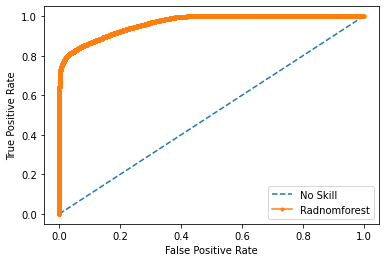

In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, pred_df["PROB"])
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, pred_df["PROB"])
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Radnomforest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

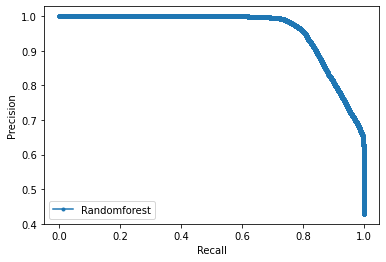

In [29]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_df["PROB"])
plt.plot(lr_recall, lr_precision, marker='.', label='Randomforest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

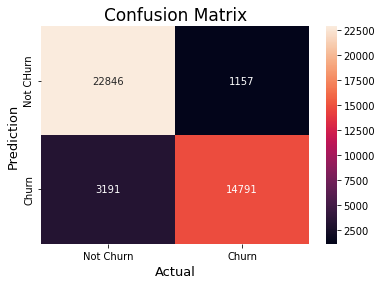

In [30]:
cm = confusion_matrix(y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Not Churn','Churn'],
            yticklabels=['Not CHurn','Churn'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [31]:
scores_data = pd.DataFrame({"ns_probs":ns_probs,
                            "y_test":y_test,
                            "y_pred":pred_df["PREDICTION"],
                            "act_probs":pred_df["PROB"]})

In [32]:
scores_data

ns_probs  y_test  y_pred  act_probs
264990         0       1       1   0.835675
141510         0       1       1   0.996249
235125         0       1       1   0.972421
96688          0       1       1   0.905288
89794          0       0       0   0.000240
...          ...     ...     ...        ...
227766         0       0       0   0.006171
13714          0       0       0   0.414682
95085          0       1       1   0.897733
252677         0       0       0   0.000930
297067         0       0       0   0.000046

[41985 rows x 4 columns]

In [33]:
scores_data.to_csv("/data/scores.csv", index=False)

In [38]:
# Define or use the prediction function
def model_prediction_score_func(dataframe):
    # Ensure 'dataframe' has the correct features required by the model
    return pipeline.predict(dataframe)  # Use your trained pipeline/model here
 
# Assuming df is your input DataFrame with the necessary features
Original_df['Model_Output'] = model_prediction_score_func(Original_df)
 
# If you have a DataFrame with test data and you want to merge predictions
# Assuming X_test is the DataFrame for which predictions are made
#X_test_with_predictions = X_test.copy()
#X_test_with_predictions['Model_Output'] = model_prediction_score_func(X_test)
 
# Display the first few rows to verify
#print(X_test_with_predictions.head())

In [39]:
Original_df

ORGANIZATION_TYPE ORGANIZATION_OWNERSHIP     SALARY  \
0       Agricultural Development            Cooperative   43118.65   
2       Agricultural Development            Cooperative   36394.69   
3       Agricultural Development            Cooperative   96880.66   
4       Agricultural Development            Cooperative   97579.66   
6       Agricultural Development            Cooperative   48058.60   
...                          ...                    ...        ...   
299995     Investment Management          Joint Venture  101713.50   
299996     Investment Management          Joint Venture  101640.50   
299997     Investment Management          Joint Venture  101998.50   
299998     Investment Management          Joint Venture  101306.50   
299999     Investment Management          Joint Venture   96701.50   

       EMPLOYEE_ID JOB_SATISFACTION  PERCENTAGE_SALARY_HIKE  \
0         94215814             High                      20   
2         14265310              Low                      13   
3         38467325              Low                      21   
4         98539130             High                      17   
6         80207814             High                      14   
...            ...              ...                     ...   
299995    66752547              Low                      17   
299996    61579487             High                      13   
299997    48056583        Very High                      21   
299998    86413761           Medium                      20   
299999    22526637             High                      14   

       PERFORMANCE_RATING OVER_TIME RELATIONSHIP_SATISFACTION CHURN_VALUE  \
0             Outstanding        No                    Medium       FALSE   
2                    Good        No                    Medium       FALSE   
3                    Good        No                 Very High       FALSE   
4                    Good        No                       Low       FALSE   
6             Outstanding        No                 Very High        TRUE   
...                   ...       ...                       ...         ...   
299995               Good        No                 Very High       FALSE   
299996          Excellent        No                 Very High       FALSE   
299997        Outstanding        No                    Medium       FALSE   
299998                Low        No                       Low       FALSE   
299999                Low       Yes                 Very High       FALSE   

        ...  SUM_OF_TENURE SUM_OF_AGE JOB_STARTDATE JOB_ENDDATE  \
0       ...              0          0    2016-06-01  2019-08-01   
2       ...              0          0    2017-06-01  2018-07-01   
3       ...              0          0    2019-09-01  2024-07-01   
4       ...              0          0    2019-09-01  2024-08-01   
6       ...              0          0    2013-10-01  2020-12-01   
...     ...            ...        ...           ...         ...   
299995  ...              0          0    2021-12-01  2023-06-01   
299996  ...              0          0    2021-12-01  2023-06-01   
299997  ...              0          0    2021-12-01  2023-06-01   
299998  ...          37548       9563    2021-12-01  2023-06-01   
299999  ...              0          0    2021-12-01  2023-06-01   

       OVERTIME_HOURS WORK_LIFE_BALANCE    BUSINESS_TRAVEL  \
0                   4              Best      Travel Rarely   
2                   8              Good      Travel Rarely   
3                  14               Bad      Travel Rarely   
4                   9              Best  Travel Frequently   
6                   3              Good      Travel Rarely   
...               ...               ...                ...   
299995              1              Good      Travel Rarely   
299996              1              Best  Travel Frequently   
299997              1              Good      Travel Rarely   
299998              1              Best  Travel Frequently   
29999

In [40]:
Original_df.to_csv("/data/Hr_Attrition_Data.csv", index=False)

In [41]:
con = snowflake.get_connection("HR_ATTRITION")

Exception occurred in getting snowflake connection: 'connectionSources'


In [42]:
import pandas as pd
if 'Model_Output' in Original_df:
    Original_df['Model_Output_Values'] = Original_df['Model_Output'].astype(bool)
print(Original_df.head())


          ORGANIZATION_TYPE ORGANIZATION_OWNERSHIP    SALARY EMPLOYEE_ID  \
0  Agricultural Development            Cooperative  43118.65    94215814   
2  Agricultural Development            Cooperative  36394.69    14265310   
3  Agricultural Development            Cooperative  96880.66    38467325   
4  Agricultural Development            Cooperative  97579.66    98539130   
6  Agricultural Development            Cooperative  48058.60    80207814   

  JOB_SATISFACTION  PERCENTAGE_SALARY_HIKE PERFORMANCE_RATING OVER_TIME  \
0             High                      20        Outstanding        No   
2              Low                      13               Good        No   
3              Low                      21               Good        No   
4             High                      17               Good        No   
6             High                      14        Outstanding        No   

  RELATIONSHIP_SATISFACTION CHURN_VALUE  ...  SUM_OF_AGE JOB_STARTDATE  \
0                 

In [43]:
file = 'HR_Attrition_Data.csv'
Original_df.to_csv(file , index=False)

In [44]:
file

'HR_Attrition_Data.csv'

In [45]:
snowflake.execute_query(f"PUT file://{file} @HR_ANALYTIC.PUBLIC.HR_ATTRITION_STAGE")

User name picked from OS env: vishal.baldwa@fosfor.com
Fetching connections created by vishal.baldwa@fosfor.com user
Connection names fetched ['HR Attrition conn'], created by vishal.baldwa@fosfor.com
Connection object created: <snowflake.connector.connection.SnowflakeConnection object at 0x7f2e7c69f610>
Please close the connection after use!
Exception occurred in execute_query: Unknown error
